In [5]:
from citipy import citipy
from random import uniform
import pandas as pd
import numpy as np
import requests
from requests.exceptions import HTTPError
import matplotlib.pyplot as plt
from datetime import datetime
import time
from api_config import w_key

# how many cities to sample 
number_of_cities = 500

# set up Open Weather API URL
# q={city name},{country code}&APPID={APIKEY}
# set units to desired key, default is kelvin
weather_url="https://api.openweathermap.org/data/2.5/weather"
w_params =  {"q" : "",
             "units" : "imperial",
            "APIKEY" : w_key}

In [52]:
# dictionary to collect 500 unique cities
cities_dict = {} 

# loop to add 500 cities to cities_dict
while len(cities_dict) < number_of_cities + 5 + number_of_cities*.25: # add 25% to ammount gathered to allow for city not found errors 

    # generate random longitude and latitude
    long_rand = uniform(-180,180)
    lat_rand = uniform(-90, 90)

    # use citypy to get name and country of nearest city, use variables for easy code reading
    city = citipy.nearest_city(lat_rand, long_rand)
    city_name = city.city_name
    city_country = city.country_code

    # add to dictionary for ease of selecting unique values, this will not allow same city name different country
    # but is an easy method to ensure unique entries in one pass
    cities_dict[city_name] = city.country_code

# dictionary to dataframe to store city information
cities = pd.DataFrame.from_dict(cities_dict, orient='index') 
cities.reset_index(inplace=True)
cities.columns = ['City','Country']
cities['Temperature']=""
cities['Humidity']=""
cities['Cloudiness']=""
cities['Wind Speed']=""
cities['Latitude']=""
cities['Longitude']=""
cities['Time']=""

In [53]:
# check if errors occured
skipped = 0

# loop through dataframe get params to set for weather lookup
for index, row in cities.iterrows():

    # assign params to query string to send to open weather API
    w_params['q'] = f"{row['City']},{row['Country']}" 
    
    try:
        # collect weather data per city from Open Weather API
        w_response = requests.post(weather_url, params=w_params)
        w_response_data = w_response.json()
        w_response.raise_for_status()
    except HTTPError as http_err:
        # print(f'HTTP error occurred: {http_err}')
        skipped = skipped + 1
        print(f"{w_response_data['message']} : {row['City']}, {row['Country']} was skipped.")
    except Exception as err:
        # print(f'Other error occurred: {err}')
        skipped = skipped + 1
        print(f"{err} : {row['City']}, {row['Country']} was skipped.")
    else:
        row['Temperature']=w_response_data["main"]["temp_max"]
        row['Humidity']=w_response_data["main"]["humidity"]
        row['Cloudiness']=w_response_data["clouds"]["all"]
        row['Wind Speed']=w_response_data["wind"]["speed"]
        row['Latitude']=w_response_data["coord"]["lat"]
        row['Longitude']=w_response_data["coord"]["lon"]
        row['Time']=w_response_data["dt"]
        #print(w_response_data)
        #print(w_response_data["main"]["temp"])
        print(f"{w_response_data['id']} : {row['City']}, {row['Country']}, ({weather_url}?q={w_params['q']}&units={w_params['units']}) has been processed")
    
    # wait 1+ second to exceed 60 per minute rate limit of API
    time.sleep(1.01)

if skipped>0:
    cities.replace('', np.nan, inplace=True)
    cities=cities.dropna()
    print("________________________________________________________________")
    print(f"{skipped} rows dropped due to error(s) retrieving data. {len(cities)} cities remaining.")
    

if len(cities) < number_of_cities:
    print("________________________________________________________________")
    print(f"Error: You requested data for {number_of_cities} but only data for {len(cities)} cities was retrieved.")
              
print("________________________________________________________________")
print(f"Weather data has been loaded for {len(cities)} cities of {number_of_cities} cities required.")




5960603 : geraldton, ca, (https://api.openweathermap.org/data/2.5/weather?q=geraldton,ca&units=imperial) has been processed
city not found : attawapiskat, ca was skipped.
city not found : ayan, ru was skipped.
2208248 : kaitangata, nz, (https://api.openweathermap.org/data/2.5/weather?q=kaitangata,nz&units=imperial) has been processed
city not found : naenwa, in was skipped.
5855927 : hilo, us, (https://api.openweathermap.org/data/2.5/weather?q=hilo,us&units=imperial) has been processed
3424607 : tasiilaq, gl, (https://api.openweathermap.org/data/2.5/weather?q=tasiilaq,gl&units=imperial) has been processed
3874787 : punta arenas, cl, (https://api.openweathermap.org/data/2.5/weather?q=punta arenas,cl&units=imperial) has been processed
1862505 : hirara, jp, (https://api.openweathermap.org/data/2.5/weather?q=hirara,jp&units=imperial) has been processed
2206939 : bluff, nz, (https://api.openweathermap.org/data/2.5/weather?q=bluff,nz&units=imperial) has been processed
2022572 : khatanga, ru,

3412093 : vestmannaeyjar, is, (https://api.openweathermap.org/data/2.5/weather?q=vestmannaeyjar,is&units=imperial) has been processed
4395255 : raymondville, us, (https://api.openweathermap.org/data/2.5/weather?q=raymondville,us&units=imperial) has been processed
2136825 : isangel, vu, (https://api.openweathermap.org/data/2.5/weather?q=isangel,vu&units=imperial) has been processed
3491952 : villa altagracia, do, (https://api.openweathermap.org/data/2.5/weather?q=villa altagracia,do&units=imperial) has been processed
2158767 : mareeba, au, (https://api.openweathermap.org/data/2.5/weather?q=mareeba,au&units=imperial) has been processed
2163355 : hobart, au, (https://api.openweathermap.org/data/2.5/weather?q=hobart,au&units=imperial) has been processed
city not found : veletma, ru was skipped.
city not found : mrirt, ma was skipped.
2119626 : yagodnoye, ru, (https://api.openweathermap.org/data/2.5/weather?q=yagodnoye,ru&units=imperial) has been processed
3896218 : castro, cl, (https://api

5762718 : belle fourche, us, (https://api.openweathermap.org/data/2.5/weather?q=belle fourche,us&units=imperial) has been processed
286621 : salalah, om, (https://api.openweathermap.org/data/2.5/weather?q=salalah,om&units=imperial) has been processed
city not found : bossembele, cf was skipped.
3395458 : maragogi, br, (https://api.openweathermap.org/data/2.5/weather?q=maragogi,br&units=imperial) has been processed
3659578 : cayambe, ec, (https://api.openweathermap.org/data/2.5/weather?q=cayambe,ec&units=imperial) has been processed
city not found : buqayq, sa was skipped.
6068416 : mayo, ca, (https://api.openweathermap.org/data/2.5/weather?q=mayo,ca&units=imperial) has been processed
2110227 : butaritari, ki, (https://api.openweathermap.org/data/2.5/weather?q=butaritari,ki&units=imperial) has been processed
3356213 : khorixas, na, (https://api.openweathermap.org/data/2.5/weather?q=khorixas,na&units=imperial) has been processed
1850144 : nishihara, jp, (https://api.openweathermap.org/da

5410430 : woodland, us, (https://api.openweathermap.org/data/2.5/weather?q=woodland,us&units=imperial) has been processed
3407243 : araripina, br, (https://api.openweathermap.org/data/2.5/weather?q=araripina,br&units=imperial) has been processed
3162651 : askim, no, (https://api.openweathermap.org/data/2.5/weather?q=askim,no&units=imperial) has been processed
5228673 : huron, us, (https://api.openweathermap.org/data/2.5/weather?q=huron,us&units=imperial) has been processed
699802 : nova praha, ua, (https://api.openweathermap.org/data/2.5/weather?q=nova praha,ua&units=imperial) has been processed
city not found : skalistyy, ru was skipped.
1801200 : haimen, cn, (https://api.openweathermap.org/data/2.5/weather?q=haimen,cn&units=imperial) has been processed
1487615 : vengerovo, ru, (https://api.openweathermap.org/data/2.5/weather?q=vengerovo,ru&units=imperial) has been processed
2409914 : bonthe, sl, (https://api.openweathermap.org/data/2.5/weather?q=bonthe,sl&units=imperial) has been pro

463516 : zharkovskiy, ru, (https://api.openweathermap.org/data/2.5/weather?q=zharkovskiy,ru&units=imperial) has been processed
1511846 : oktyabrskoye, ru, (https://api.openweathermap.org/data/2.5/weather?q=oktyabrskoye,ru&units=imperial) has been processed
2417886 : mali, gn, (https://api.openweathermap.org/data/2.5/weather?q=mali,gn&units=imperial) has been processed
921786 : mitsamiouli, km, (https://api.openweathermap.org/data/2.5/weather?q=mitsamiouli,km&units=imperial) has been processed
5880568 : bethel, us, (https://api.openweathermap.org/data/2.5/weather?q=bethel,us&units=imperial) has been processed
3382160 : cayenne, gf, (https://api.openweathermap.org/data/2.5/weather?q=cayenne,gf&units=imperial) has been processed
483495 : komsomolskoye, ru, (https://api.openweathermap.org/data/2.5/weather?q=komsomolskoye,ru&units=imperial) has been processed
1490256 : talnakh, ru, (https://api.openweathermap.org/data/2.5/weather?q=talnakh,ru&units=imperial) has been processed
913613 : kans

3131824 : vigrestad, no, (https://api.openweathermap.org/data/2.5/weather?q=vigrestad,no&units=imperial) has been processed
2138103 : thio, nc, (https://api.openweathermap.org/data/2.5/weather?q=thio,nc&units=imperial) has been processed
city not found : samusu, ws was skipped.
3577154 : oranjestad, aw, (https://api.openweathermap.org/data/2.5/weather?q=oranjestad,aw&units=imperial) has been processed
5859699 : college, us, (https://api.openweathermap.org/data/2.5/weather?q=college,us&units=imperial) has been processed
986717 : kruisfontein, za, (https://api.openweathermap.org/data/2.5/weather?q=kruisfontein,za&units=imperial) has been processed
6122230 : ridgetown, ca, (https://api.openweathermap.org/data/2.5/weather?q=ridgetown,ca&units=imperial) has been processed
1253237 : veraval, in, (https://api.openweathermap.org/data/2.5/weather?q=veraval,in&units=imperial) has been processed
3902377 : trinidad, bo, (https://api.openweathermap.org/data/2.5/weather?q=trinidad,bo&units=imperial)

3394745 : mocajuba, br, (https://api.openweathermap.org/data/2.5/weather?q=mocajuba,br&units=imperial) has been processed
2176639 : batemans bay, au, (https://api.openweathermap.org/data/2.5/weather?q=batemans bay,au&units=imperial) has been processed
city not found : pemangkat, id was skipped.
city not found : louisbourg, ca was skipped.
260780 : kastrakion, gr, (https://api.openweathermap.org/data/2.5/weather?q=kastrakion,gr&units=imperial) has been processed
city not found : goderich, sl was skipped.
3441894 : maldonado, uy, (https://api.openweathermap.org/data/2.5/weather?q=maldonado,uy&units=imperial) has been processed
237379 : ndele, cf, (https://api.openweathermap.org/data/2.5/weather?q=ndele,cf&units=imperial) has been processed
3698304 : chimbote, pe, (https://api.openweathermap.org/data/2.5/weather?q=chimbote,pe&units=imperial) has been processed
3374333 : praia, cv, (https://api.openweathermap.org/data/2.5/weather?q=praia,cv&units=imperial) has been processed
2253354 : daka

1521315 : lisakovsk, kz, (https://api.openweathermap.org/data/2.5/weather?q=lisakovsk,kz&units=imperial) has been processed
3533462 : acapulco, mx, (https://api.openweathermap.org/data/2.5/weather?q=acapulco,mx&units=imperial) has been processed
3939761 : hualmay, pe, (https://api.openweathermap.org/data/2.5/weather?q=hualmay,pe&units=imperial) has been processed
3522307 : tepexpan, mx, (https://api.openweathermap.org/data/2.5/weather?q=tepexpan,mx&units=imperial) has been processed
6301965 : palmerston, au, (https://api.openweathermap.org/data/2.5/weather?q=palmerston,au&units=imperial) has been processed
city not found : marcona, pe was skipped.
5110292 : brookhaven, us, (https://api.openweathermap.org/data/2.5/weather?q=brookhaven,us&units=imperial) has been processed
2278158 : buchanan, lr, (https://api.openweathermap.org/data/2.5/weather?q=buchanan,lr&units=imperial) has been processed
city not found : labrea, br was skipped.
610298 : beyneu, kz, (https://api.openweathermap.org/da

1213855 : sibolga, id, (https://api.openweathermap.org/data/2.5/weather?q=sibolga,id&units=imperial) has been processed
964712 : plettenberg bay, za, (https://api.openweathermap.org/data/2.5/weather?q=plettenberg bay,za&units=imperial) has been processed
2313002 : matadi, cd, (https://api.openweathermap.org/data/2.5/weather?q=matadi,cd&units=imperial) has been processed
2065594 : mount isa, au, (https://api.openweathermap.org/data/2.5/weather?q=mount isa,au&units=imperial) has been processed
4014603 : chalchihuites, mx, (https://api.openweathermap.org/data/2.5/weather?q=chalchihuites,mx&units=imperial) has been processed
city not found : dekoa, cf was skipped.
2018735 : nyurba, ru, (https://api.openweathermap.org/data/2.5/weather?q=nyurba,ru&units=imperial) has been processed
1568770 : quang ngai, vn, (https://api.openweathermap.org/data/2.5/weather?q=quang ngai,vn&units=imperial) has been processed
1490356 : tabuny, ru, (https://api.openweathermap.org/data/2.5/weather?q=tabuny,ru&unit

In [54]:
w_response_data

{'coord': {'lon': 39.89, 'lat': 59.22},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 50.96,
  'pressure': 1000.69,
  'humidity': 82,
  'temp_min': 50.96,
  'temp_max': 50.96,
  'sea_level': 1000.69,
  'grnd_level': 983.15},
 'wind': {'speed': 3.4, 'deg': 298.887},
 'clouds': {'all': 93},
 'dt': 1562545804,
 'sys': {'message': 0.0077,
  'country': 'RU',
  'sunrise': 1562545127,
  'sunset': 1562610700},
 'timezone': 10800,
 'id': 472459,
 'name': 'Vologda',
 'cod': 200}

In [55]:
cities

,City,Country,Temperature,Humidity,Cloudiness,Wind Speed,Latitude,Longitude,Time
0,geraldton,ca,71.60,43.0,75.0,10.29,49.72,-86.95,1.562545e+09
3,kaitangata,nz,44.01,56.0,100.0,13.00,-46.28,169.85,1.562545e+09
5,hilo,us,88.00,58.0,1.0,11.41,19.71,-155.08,1.562545e+09
6,tasiilaq,gl,51.80,50.0,1.0,4.70,65.61,-37.64,1.562545e+09
7,punta arenas,cl,39.20,93.0,40.0,8.05,-53.16,-70.91,1.562545e+09
8,hirara,jp,84.20,94.0,75.0,8.05,24.80,125.28,1.562545e+09
9,bluff,nz,42.01,87.0,98.0,14.00,-46.60,168.33,1.562545e+09
10,khatanga,ru,48.87,76.0,100.0,16.20,71.98,102.47,1.562545e+09
11,qaanaaq,gl,45.67,58.0,83.0,3.78,77.48,-69.36,1.562545e+09
13,nemuro,jp,59.00,93.0,75.0,3.36,43.32,145.57,1.562545e+09


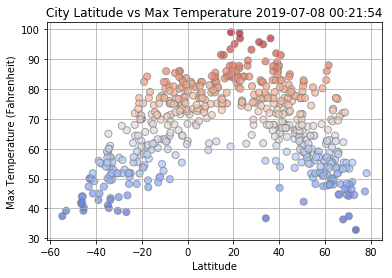

In [56]:
cm = plt.cm.get_cmap('coolwarm')

plt.scatter(cities["Latitude"],cities["Temperature"] 
, s=50, c=cities["Temperature"], cmap=cm, alpha=.7, edgecolor="gray")

plt.title(f"City Latitude vs Max Temperature {datetime.utcfromtimestamp(cities['Time'].mean()).strftime('%Y-%m-%d %H:%M:%S')}")
plt.xlabel("Lattitude")
plt.ylabel("Max Temperature (Fahrenheit)")

plt.grid()
plt.show()

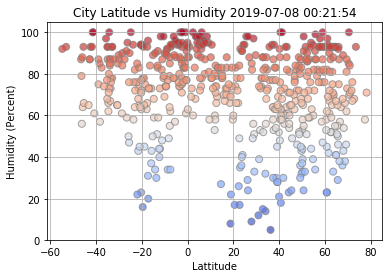

In [57]:
cm = plt.cm.get_cmap('coolwarm')

plt.scatter(cities["Latitude"],cities["Humidity"] 
, s=50, c=cities["Humidity"], cmap=cm, alpha=.7, edgecolor="gray")

plt.title(f"City Latitude vs Humidity {datetime.utcfromtimestamp(cities['Time'].mean()).strftime('%Y-%m-%d %H:%M:%S')}")
plt.xlabel("Lattitude")
plt.ylabel("Humidity (Percent)")

plt.grid()
plt.show()

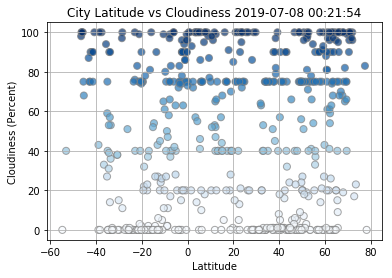

In [58]:
cm = plt.cm.get_cmap('Blues')

plt.scatter(cities["Latitude"],cities["Cloudiness"] 
, s=50, c=cities["Cloudiness"], cmap=cm, alpha=.7, edgecolor="gray")

plt.title(f"City Latitude vs Cloudiness {datetime.utcfromtimestamp(cities['Time'].mean()).strftime('%Y-%m-%d %H:%M:%S')}")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (Percent)")

plt.grid()
plt.show()

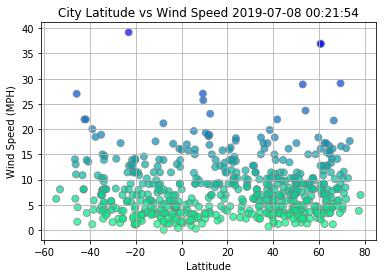

In [59]:
cm = plt.cm.get_cmap('winter')

plt.scatter(cities["Latitude"],cities["Wind Speed"] 
, s=50, c=200-cities["Wind Speed"], cmap=cm, alpha=.7, edgecolor="gray")

plt.title(f"City Latitude vs Wind Speed {datetime.utcfromtimestamp(cities['Time'].mean()).strftime('%Y-%m-%d %H:%M:%S')}")
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (MPH)")

plt.grid()
plt.show()